In [1]:
import numpy as np
from matplotlib import pyplot as plt
from jupyterthemes import jtplot
jtplot.style('grade3')

In [2]:
path = './Eva/clear3-malicious1_Ditto_avg_acc_test_mnist.txt'
acc = np.loadtxt(path)

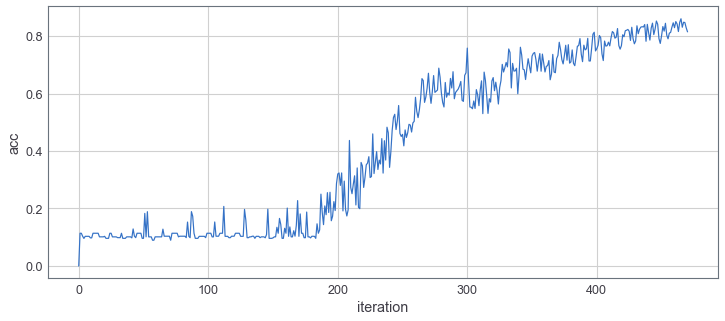

In [3]:
plt.figure(figsize=(12, 5))
plt.plot(np.arange(len(acc)), acc)
plt.xlabel('iteration')
plt.ylabel('acc')
plt.show()

In [4]:
import hdbscan
from sklearn.metrics.pairwise import pairwise_distances

In [5]:
cluster = hdbscan.HDBSCAN(metric='precomputed', min_cluster_size=2)

c1 = np.random.normal(0, 1, size=(20,2))
c2 = np.random.normal(5, 1, size=(20,2))
c3 = np.random.normal(-3, 1, size=(20,2))
data = [c1, c2, c3]
colors = ['r', 'b', 'y']

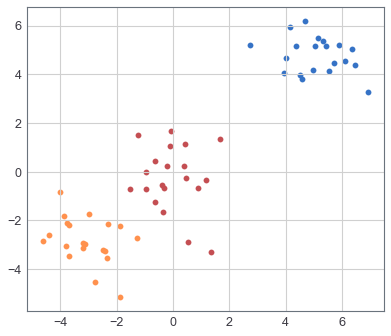

In [6]:
for i in range(len(data)):
    plt.scatter(data[i][:,0], data[i][:,1], c=colors[i])
plt.show()

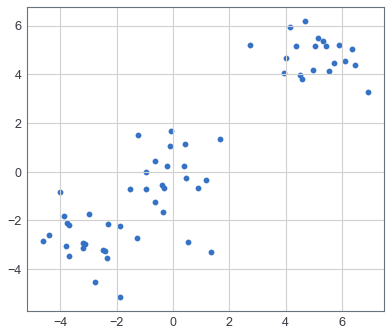

In [7]:
weights_in = np.array(data).reshape(60,2)
plt.scatter(weights_in[:,0], weights_in[:,1])
plt.show()

In [8]:
distance_matrix = pairwise_distances(weights_in, metric='cosine')
cluster.fit(distance_matrix) 
label = cluster.labels_

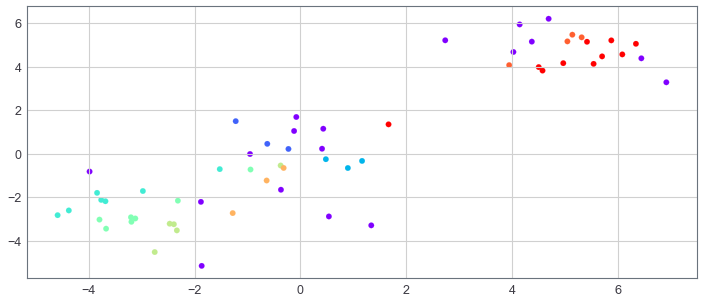

In [9]:
plt.figure(figsize=(12,5))
plt.scatter(weights_in[:,0], weights_in[:,1], c=label, cmap='rainbow')
plt.show()

In [10]:
num_workers = 60
b = []
if (label==-1).all():
    b = [i for i in range(num_workers)]
else:
#     bucket = np.zeros(label.shape)
#     for value in label:
#         if value != -1:
#             bucket[value] += 1
#     majority = np.argmax(bucket)
#     b = np.array(np.where(label == majority))
#     b = b.reshape(b.shape[1],).tolist()
    label_class, label_count = np.unique(label[1:], return_counts=True)
    majority = label_class[np.argmax(label_count[1:])+1]
    b = np.where(label==majority)[0].tolist()

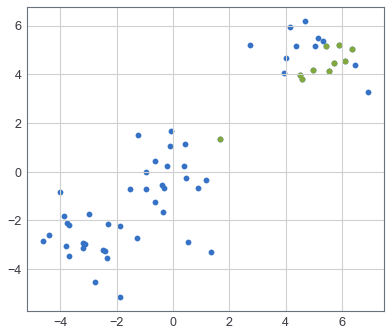

In [11]:
plt.scatter(weights_in[:,0], weights_in[:,1])
plt.scatter(weights_in[np.where(label==majority)][:,0], weights_in[np.where(label==majority)][:,1])
plt.show()